In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib as mat
import datetime as dt
from time import time
mat.rcParams["figure.figsize"]=(15,8)
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")





In [2]:
df = pd.read_csv("./Turbine_Data.csv",parse_dates=["Unnamed: 0"],index_col="Unnamed: 0") #要不要处理一下
df.tail()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,...,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WTG,WindDirection,WindSpeed
2020-03-30 23:10:00+00:00,70.044465,27.523741,45.711129,1.515669,1.950088,1.950088,0.0,59.821165,55.193793,1029.870744,...,58.148777,39.008931,36.476562,178.0,13.775785,9.234004,2.0,G01,178.0,3.533445
2020-03-30 23:20:00+00:00,40.833474,27.602882,45.598573,1.702809,2.136732,2.136732,0.0,59.142038,54.798545,1030.160478,...,57.550367,39.006759,36.328125,178.0,8.088928,9.229370,2.0,G01,178.0,3.261231
2020-03-30 23:30:00+00:00,20.777790,27.560925,45.462045,1.706214,2.139664,2.139664,0.0,58.439439,54.380456,1030.137822,...,57.099335,39.003815,36.131944,178.0,4.355978,9.236802,2.0,G01,178.0,3.331839
2020-03-30 23:40:00+00:00,62.091039,27.810472,45.343827,1.575352,2.009781,2.009781,0.0,58.205413,54.079014,1030.178178,...,56.847239,39.003815,36.007805,190.0,12.018077,9.237374,2.0,G01,190.0,3.284468
2020-03-30 23:50:00+00:00,68.664425,27.915828,45.231610,1.499323,1.933124,1.933124,0.0,58.581716,54.080505,1029.834789,...,56.741040,39.003815,35.914062,203.0,14.439669,9.235532,2.0,G01,203.0,3.475205


In [3]:
df.index=pd.to_datetime(df.index)
df.head()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,...,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WTG,WindDirection,WindSpeed
2017-12-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2017-12-31 00:10:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2017-12-31 00:20:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2017-12-31 00:30:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2017-12-31 00:40:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 118224 entries, 2017-12-31 00:00:00+00:00 to 2020-03-30 23:50:00+00:00
Data columns (total 21 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   ActivePower                   94750 non-null   float64
 1   AmbientTemperatue             93817 non-null   float64
 2   BearingShaftTemperature       62518 non-null   float64
 3   Blade1PitchAngle              41996 non-null   float64
 4   Blade2PitchAngle              41891 non-null   float64
 5   Blade3PitchAngle              41891 non-null   float64
 6   ControlBoxTemperature         62160 non-null   float64
 7   GearboxBearingTemperature     62540 non-null   float64
 8   GearboxOilTemperature         62438 non-null   float64
 9   GeneratorRPM                  62295 non-null   float64
 10  GeneratorWinding1Temperature  62427 non-null   float64
 11  GeneratorWinding2Temperature  62449 non-null   float64
 12

In [5]:
df.shape

(118224, 21)

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.shape

(95185, 21)

In [8]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
ActivePower,94624.0,619.036994,610.917748,-38.524659,80.098952,402.880706,1073.979105,1.779032e+03
AmbientTemperatue,93698.0,28.777569,4.358470,0.000000,25.625603,28.338961,31.665910,4.240560e+01
BearingShaftTemperature,62380.0,43.105338,5.168850,0.000000,39.856871,42.927465,47.018075,5.508866e+01
Blade1PitchAngle,41987.0,9.751759,20.646533,-43.156734,-0.939896,0.395038,8.101939,9.014361e+01
Blade2PitchAngle,41882.0,10.038709,20.272100,-26.443415,-0.433316,0.889782,8.481306,9.001783e+01
Blade3PitchAngle,41882.0,10.038709,20.272100,-26.443415,-0.433316,0.889782,8.481306,9.001783e+01
ControlBoxTemperature,62022.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
GearboxBearingTemperature,62402.0,64.376222,10.020754,0.000000,57.925129,64.862406,71.104401,8.223793e+01
GearboxOilTemperature,62430.0,57.561706,6.324124,0.000000,53.944023,57.197064,61.307270,7.076458e+01
GeneratorRPM,62287.0,1102.146658,527.967896,0.000000,1029.812895,1124.930500,1515.517020,1.809942e+03


In [9]:
df.drop(columns  = ['WTG','ControlBoxTemperature'], inplace = True) #wtg 没有用的value  ControlBoxTemperature和另外一个是一样的

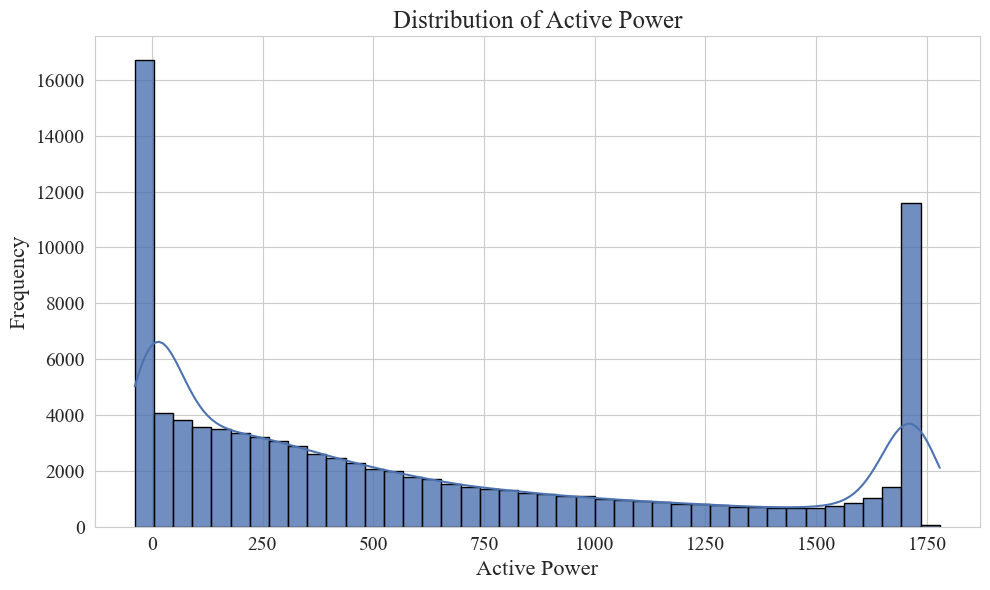

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
plt.rcParams.update({'font.family': 'serif', 'font.serif': ['Times New Roman']})
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='ActivePower', color='#4C72B0', kde=True, alpha=0.8, edgecolor='black')
plt.xlabel('Active Power', fontsize=16, fontname='Times New Roman')
plt.ylabel('Frequency', fontsize=16, fontname='Times New Roman')
plt.xticks(fontsize=14, fontname='Times New Roman')
plt.yticks(fontsize=14, fontname='Times New Roman')
plt.title('Distribution of Active Power', fontsize=18, fontname='Times New Roman')
plt.tight_layout()
plt.savefig('Active Power.svg', format='svg', dpi=1200, bbox_inches='tight')
plt.show()


In [11]:
df.isnull().sum()  #查0

ActivePower                       561
AmbientTemperatue                1487
BearingShaftTemperature         32805
Blade1PitchAngle                53198
Blade2PitchAngle                53303
Blade3PitchAngle                53303
GearboxBearingTemperature       32783
GearboxOilTemperature           32755
GeneratorRPM                    32898
GeneratorWinding1Temperature    32766
GeneratorWinding2Temperature    32744
HubTemperature                  32917
MainBoxTemperature              32816
NacellePosition                 23077
ReactivePower                     563
RotorRPM                        33066
TurbineStatus                   32426
WindDirection                   23077
WindSpeed                         716
dtype: int64

In [12]:
# 删除负值 
cl = ['ActivePower','WindSpeed']
df[cl][df['ActivePower']<0]

,ActivePower,WindSpeed
2018-01-01 00:00:00+00:00,-5.357727,2.279088
2018-01-01 00:10:00+00:00,-5.822360,2.339343
2018-01-01 00:20:00+00:00,-5.279409,2.455610
2018-01-01 00:30:00+00:00,-4.648054,2.026754
2018-01-01 00:40:00+00:00,-4.684632,1.831420
...,...,...
2020-03-30 03:50:00+00:00,-7.005695,2.505505
2020-03-30 04:00:00+00:00,-5.576951,2.174616
2020-03-30 04:10:00+00:00,-4.945515,2.333189
2020-03-30 04:20:00+00:00,-6.565684,2.946595


In [13]:
df=df[df.index>="2019-01-01"] #18年一天

In [14]:
df = df[df['ActivePower']>=0]

In [15]:
df

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed
2019-01-01 00:00:00+00:00,460.174422,19.501460,39.723162,NaN,NaN,NaN,65.525475,55.783261,1140.444030,59.083895,58.330023,29.275023,28.697401,NaN,-0.558813,10.231713,2.0,NaN,6.057610
2019-01-01 00:10:00+00:00,429.089573,19.462428,39.593168,NaN,NaN,NaN,65.525652,55.931193,1113.333950,58.664207,57.917016,29.004748,28.687500,NaN,-0.190576,9.987514,2.0,NaN,6.112440
2019-01-01 00:20:00+00:00,427.750086,19.407230,39.413213,NaN,NaN,NaN,65.359961,55.848357,1112.593940,58.091497,57.346330,29.001907,28.659638,NaN,-0.489148,9.974075,2.0,NaN,6.138910
2019-01-01 00:30:00+00:00,438.649299,19.388731,39.297822,NaN,NaN,NaN,65.412953,55.945489,1111.127140,57.740270,57.004632,29.001907,28.592482,NaN,-0.346443,9.964816,2.0,NaN,5.917395
2019-01-01 00:40:00+00:00,461.037332,19.406248,39.186556,NaN,NaN,NaN,65.621036,55.918306,1138.942370,57.560538,56.825628,29.001907,28.506795,203.0,-0.153802,10.208557,2.0,203.0,5.971805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-30 23:10:00+00:00,70.044465,27.523741,45.711129,1.515669,1.950088,1.950088,59.821165,55.193793,1029.870744,59.060367,58.148777,39.008931,36.476562,178.0,13.775785,9.234004,2.0,178.0,3.533445
2020-03-30 23:20:00+00:00,40.833474,27.602882,45.598573,1.702809,2.136732,2.136732,59.142038,54.798545,1030.160478,58.452003,57.550367,39.006759,36.328125,178.0,8.088928,9.229370,2.0,178.0,3.261231
2020-03-30 23:30:00+00:00,20.777790,27.560925,45.462045,1.706214,2.139664,2.139664,58.439439,54.380456,1030.137822,58.034071,57.099335,39.003815,36.131944,178.0,4.355978,9.236802,2.0,178.0,3.331839
2020-03-30 23:40:00+00:00,62.091039,27.810472,45.343827,1.575352,2.009781,2.009781,58.205413,54.079014,1030.178178,57.795387,56.847239,39.003815,36.007805,190.0,12.018077,9.237374,2.0,190.0,3.284468


In [16]:
df.isna().sum()

ActivePower                         0
AmbientTemperatue                1012
BearingShaftTemperature          1046
Blade1PitchAngle                13833
Blade2PitchAngle                13916
Blade3PitchAngle                13916
GearboxBearingTemperature        1044
GearboxOilTemperature            1033
GeneratorRPM                     1037
GeneratorWinding1Temperature     1019
GeneratorWinding2Temperature     1012
HubTemperature                   1154
MainBoxTemperature               1067
NacellePosition                 12826
ReactivePower                      36
RotorRPM                         1043
TurbineStatus                     685
WindDirection                   12826
WindSpeed                          28
dtype: int64

Text(0, 0.5, 'Power')

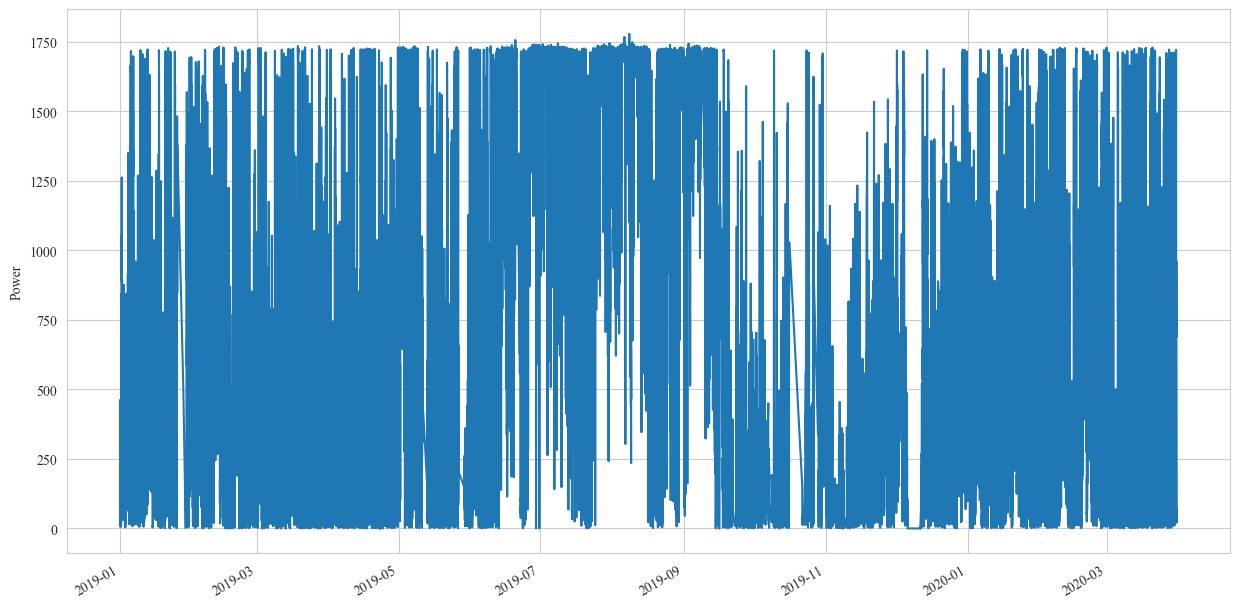

In [17]:
# Power output 
df['ActivePower'].plot()
plt.ylabel('Power')

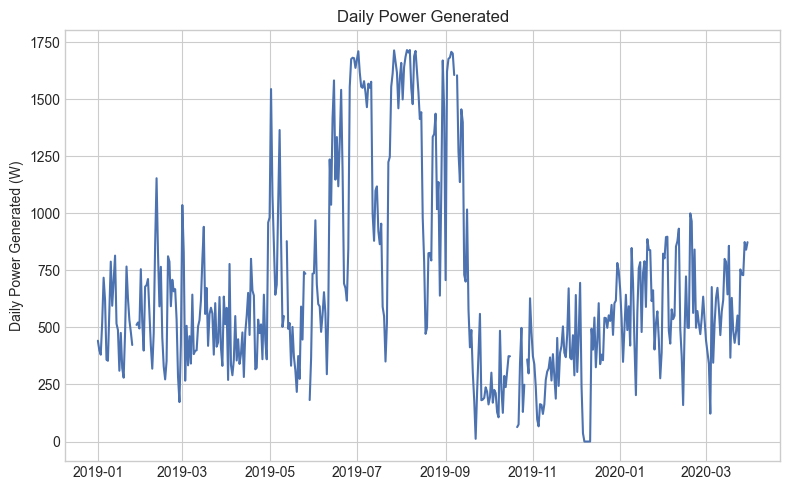

In [18]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

daily_power = df['ActivePower'].resample('D').mean()

fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(daily_power, linestyle='-', color='#4C72B0')

ax.set_ylabel('Daily Power Generated (W)')
ax.set_title('Daily Power Generated')
ax.grid(True)

plt.tight_layout()

plt.show()

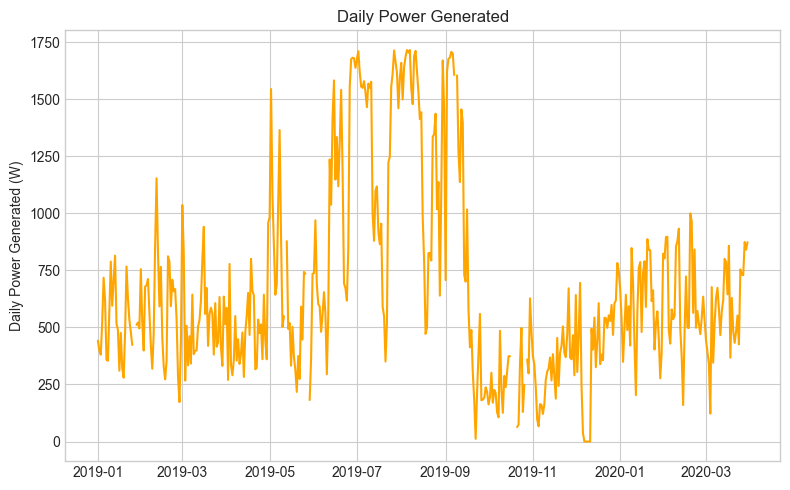

In [19]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

daily_power = df['ActivePower'].resample('D').mean()

fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(daily_power, linestyle='-', color='orange')

ax.set_ylabel('Daily Power Generated (W)')
ax.set_title('Daily Power Generated')
ax.grid(True)

plt.tight_layout()

plt.show()

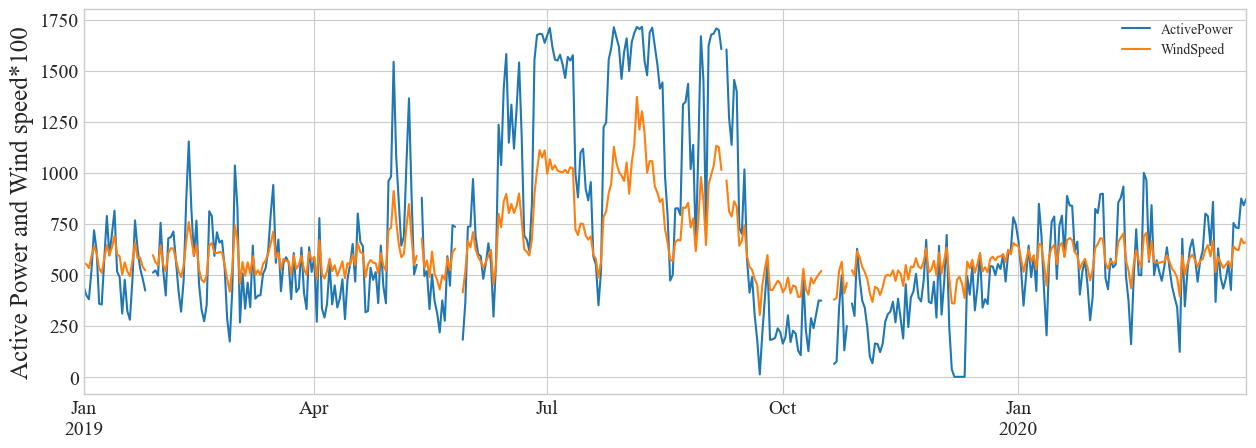

In [20]:
# Graph together day wise
plt.rcParams.update({'font.family': 'serif', 'font.serif': ['Times New Roman']})
plt.figure(figsize=(15,5))
df['ActivePower'].resample('D').mean().plot(legend=True)
(df['WindSpeed']*100).resample('D').mean().plot(legend=True)
plt.ylabel('Active Power and Wind speed*100', fontsize=18, fontname='Times New Roman')
plt.xticks(fontsize=14, fontname='Times New Roman')
plt.yticks(fontsize=14, fontname='Times New Roman')
plt.savefig('123.svg', format='svg', dpi=1200, bbox_inches='tight')
plt.show()

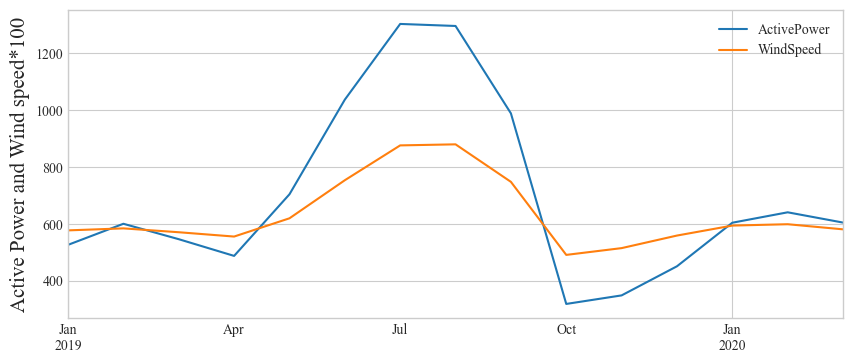

In [21]:
# Graph together month wise
plt.figure(figsize=(10,4))
df['ActivePower'].resample('M').mean().plot(legend=True)
(df['WindSpeed']*100).resample('M').mean().plot(legend=True)
plt.rcParams['font.family'] = 'Times New Roman'
plt.ylabel('Active Power and Wind speed*100', fontsize=15)
plt.savefig('456.svg', format='svg', dpi=1200, bbox_inches='tight')

<AxesSubplot:>

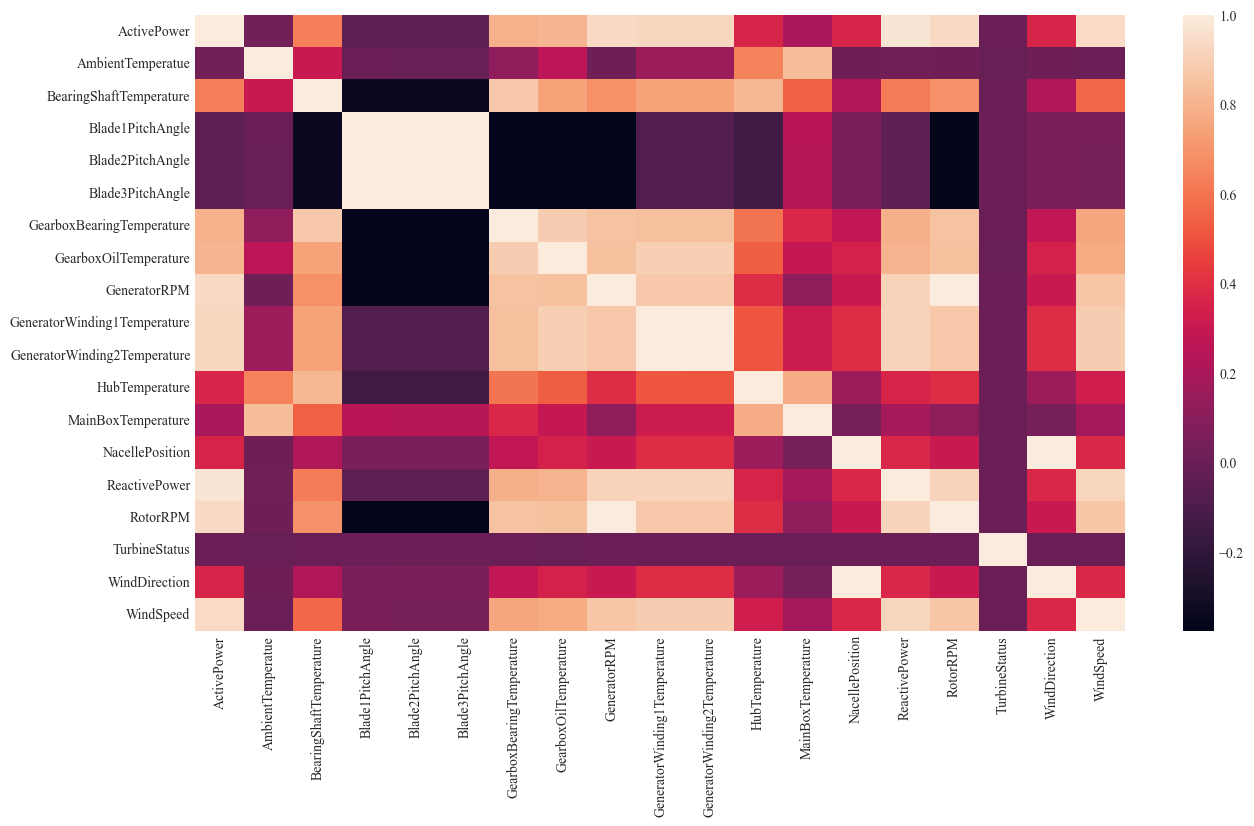

In [22]:
# To find the correlation among the columns using pearson method 

corr = df.corr()
sns.heatmap(corr)

In [23]:
df.corr().unstack()["ActivePower"].sort_values()

Blade2PitchAngle               -0.042700
Blade3PitchAngle               -0.042700
Blade1PitchAngle               -0.042637
TurbineStatus                  -0.000938
AmbientTemperatue               0.027172
MainBoxTemperature              0.197939
WindDirection                   0.356125
NacellePosition                 0.356125
HubTemperature                  0.364611
BearingShaftTemperature         0.633939
GearboxBearingTemperature       0.794551
GearboxOilTemperature           0.804202
GeneratorWinding1Temperature    0.925967
GeneratorWinding2Temperature    0.927266
GeneratorRPM                    0.930597
RotorRPM                        0.932286
WindSpeed                       0.936081
ReactivePower                   0.977360
ActivePower                     1.000000
dtype: float64

In [24]:
#>0.3
df.corr().unstack()["ActivePower"].sort_values().index

Index(['Blade2PitchAngle', 'Blade3PitchAngle', 'Blade1PitchAngle',
       'TurbineStatus', 'AmbientTemperatue', 'MainBoxTemperature',
       'WindDirection', 'NacellePosition', 'HubTemperature',
       'BearingShaftTemperature', 'GearboxBearingTemperature',
       'GearboxOilTemperature', 'GeneratorWinding1Temperature',
       'GeneratorWinding2Temperature', 'GeneratorRPM', 'RotorRPM', 'WindSpeed',
       'ReactivePower', 'ActivePower'],
      dtype='object')

In [25]:
filter=df[['WindDirection', 'NacellePosition', 'HubTemperature',
       'BearingShaftTemperature', 'GearboxBearingTemperature',
       'GearboxOilTemperature', 'GeneratorWinding1Temperature',
       'GeneratorWinding2Temperature', 'GeneratorRPM', 'RotorRPM', 'WindSpeed',
       'ReactivePower', 'ActivePower']]

In [26]:
filter.isnull().sum()

WindDirection                   12826
NacellePosition                 12826
HubTemperature                   1154
BearingShaftTemperature          1046
GearboxBearingTemperature        1044
GearboxOilTemperature            1033
GeneratorWinding1Temperature     1019
GeneratorWinding2Temperature     1012
GeneratorRPM                     1037
RotorRPM                         1043
WindSpeed                          28
ReactivePower                      36
ActivePower                         0
dtype: int64

In [27]:
# Imputing with MICE   填补数据
#from sklearn.experimental import enable_iterative_imputer
#from sklearn.impute import IterativeImputer
#from sklearn import linear_model
df_mice = filter.copy()
# Define MICE Imputer and fill missing values
df_mice_imputed = df_mice.fillna(method='ffill').fillna(method='bfill')
#mice_imputer = IterativeImputer(estimator=linear_model.BayesianRidge(), n_nearest_features=None, imputation_order='ascending')
#mice_imputer
#df_mice_imputed = pd.DataFrame(mice_imputer.fit_transform(df_mice), columns=df_mice.columns,index=df_mice.index)

In [28]:
df_mice_imputed.isnull().sum()

WindDirection                   0
NacellePosition                 0
HubTemperature                  0
BearingShaftTemperature         0
GearboxBearingTemperature       0
GearboxOilTemperature           0
GeneratorWinding1Temperature    0
GeneratorWinding2Temperature    0
GeneratorRPM                    0
RotorRPM                        0
WindSpeed                       0
ReactivePower                   0
ActivePower                     0
dtype: int64

In [29]:
pca_df=df_mice_imputed[[ 'HubTemperature',
       'BearingShaftTemperature', 'GearboxBearingTemperature',
       'GearboxOilTemperature', 'RotorRPM', 'WindSpeed',
       'ReactivePower',"ActivePower"]]              

Text(0.5, 1.0, 'relation between ActivePower and WindSpeed ')

<Figure size 500x300 with 0 Axes>

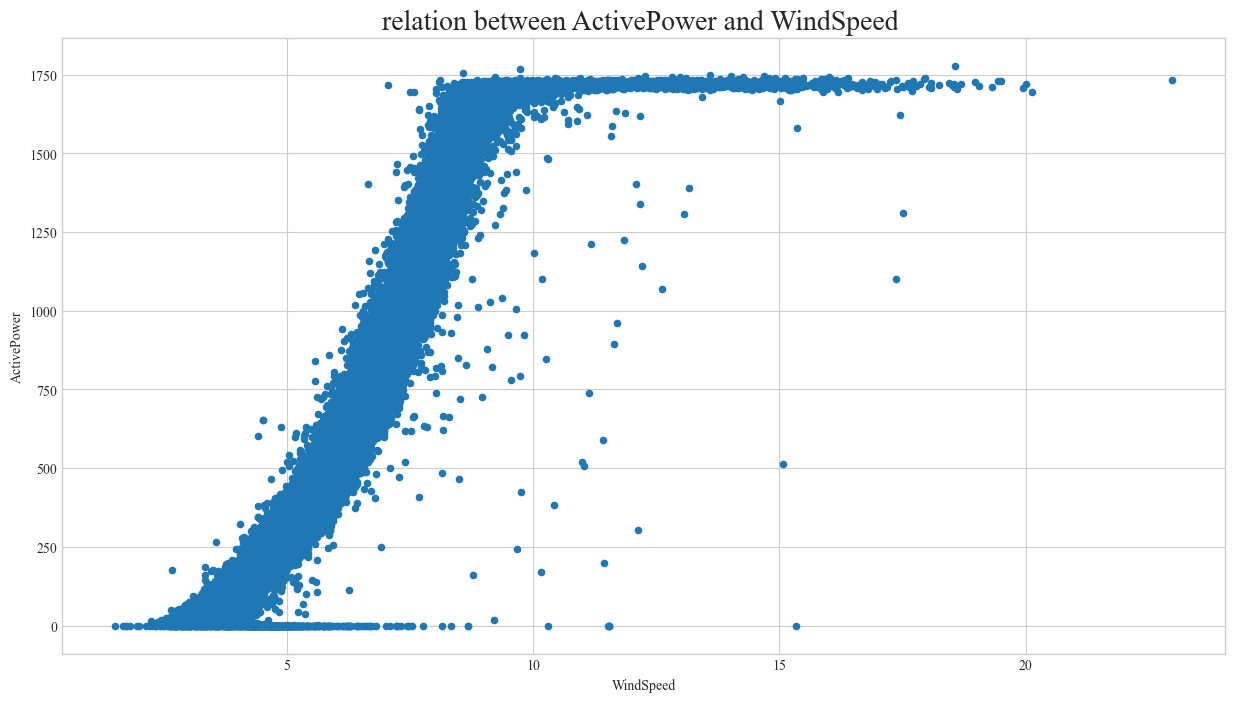

In [30]:
plt.figure(figsize=(5,3))
df_mice_imputed.plot.scatter(y='ActivePower', x='WindSpeed')
#sns.pointplot( x='WindSpeed',y='ActivePower',data=df_mice_imputed)
plt.title('relation between ActivePower and WindSpeed ', fontsize=20 )

In [31]:
#pca_df["ReactivePower"].mask( pca_df["ReactivePower"]<0, np.nan , inplace=True )
#pca_df['GearboxOilTemperature'].mask( pca_df['GearboxOilTemperature']<40, np.nan , inplace=True )

In [32]:
pca_df.isnull().sum()

HubTemperature               0
BearingShaftTemperature      0
GearboxBearingTemperature    0
GearboxOilTemperature        0
RotorRPM                     0
WindSpeed                    0
ReactivePower                0
ActivePower                  0
dtype: int64

In [33]:
out=pca_df.copy()

In [34]:
#out=out.mask(out.sub(out.mean()).div(out.std()).abs().gt(2))

In [35]:
out.isnull().sum()

HubTemperature               0
BearingShaftTemperature      0
GearboxBearingTemperature    0
GearboxOilTemperature        0
RotorRPM                     0
WindSpeed                    0
ReactivePower                0
ActivePower                  0
dtype: int64

In [36]:
Final=out.fillna(method='ffill').fillna(method='bfill')

In [37]:
Final

,HubTemperature,BearingShaftTemperature,GearboxBearingTemperature,GearboxOilTemperature,RotorRPM,WindSpeed,ReactivePower,ActivePower
2019-01-01 00:00:00+00:00,29.275023,39.723162,65.525475,55.783261,10.231713,6.057610,-0.558813,460.174422
2019-01-01 00:10:00+00:00,29.004748,39.593168,65.525652,55.931193,9.987514,6.112440,-0.190576,429.089573
2019-01-01 00:20:00+00:00,29.001907,39.413213,65.359961,55.848357,9.974075,6.138910,-0.489148,427.750086
2019-01-01 00:30:00+00:00,29.001907,39.297822,65.412953,55.945489,9.964816,5.917395,-0.346443,438.649299
2019-01-01 00:40:00+00:00,29.001907,39.186556,65.621036,55.918306,10.208557,5.971805,-0.153802,461.037332
...,...,...,...,...,...,...,...,...
2020-03-30 23:10:00+00:00,39.008931,45.711129,59.821165,55.193793,9.234004,3.533445,13.775785,70.044465
2020-03-30 23:20:00+00:00,39.006759,45.598573,59.142038,54.798545,9.229370,3.261231,8.088928,40.833474
2020-03-30 23:30:00+00:00,39.003815,45.462045,58.439439,54.380456,9.236802,3.331839,4.355978,20.777790
2020-03-30 23:40:00+00:00,39.003815,45.343827,58.205413,54.079014,9.237374,3.284468,12.018077,62.091039


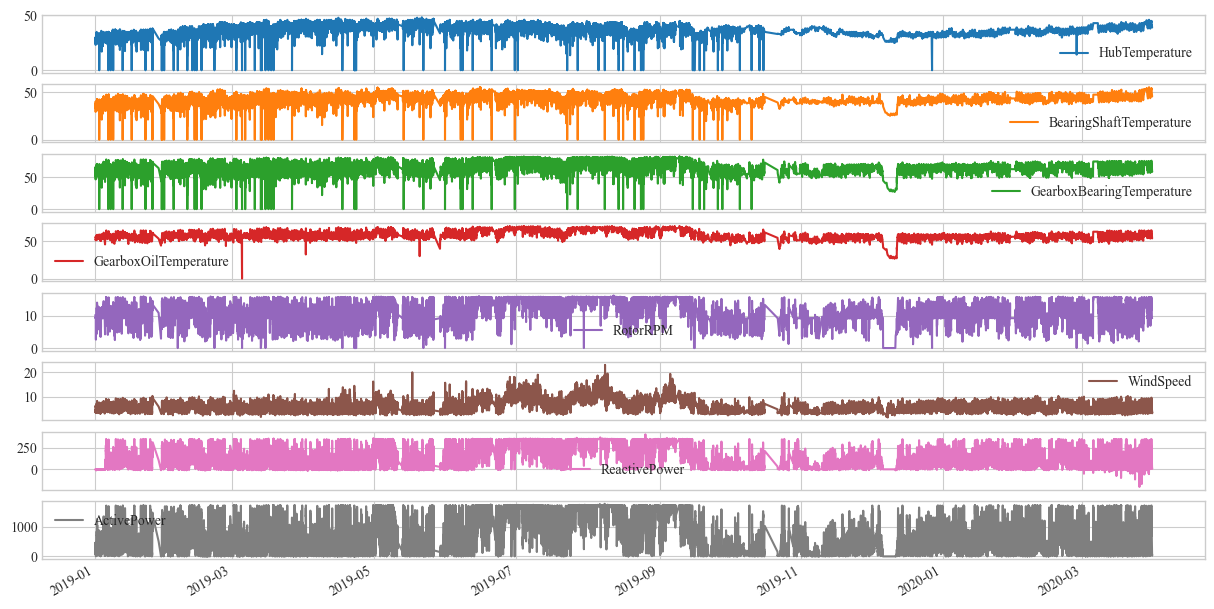

In [38]:
Final.plot(subplots=True);

In [39]:
Final.shape

(49540, 8)

In [40]:
Final.head(5)

,HubTemperature,BearingShaftTemperature,GearboxBearingTemperature,GearboxOilTemperature,RotorRPM,WindSpeed,ReactivePower,ActivePower
2019-01-01 00:00:00+00:00,29.275023,39.723162,65.525475,55.783261,10.231713,6.057610,-0.558813,460.174422
2019-01-01 00:10:00+00:00,29.004748,39.593168,65.525652,55.931193,9.987514,6.112440,-0.190576,429.089573
2019-01-01 00:20:00+00:00,29.001907,39.413213,65.359961,55.848357,9.974075,6.138910,-0.489148,427.750086
2019-01-01 00:30:00+00:00,29.001907,39.297822,65.412953,55.945489,9.964816,5.917395,-0.346443,438.649299
2019-01-01 00:40:00+00:00,29.001907,39.186556,65.621036,55.918306,10.208557,5.971805,-0.153802,461.037332


In [41]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVR

In [42]:
Final.head()

,HubTemperature,BearingShaftTemperature,GearboxBearingTemperature,GearboxOilTemperature,RotorRPM,WindSpeed,ReactivePower,ActivePower
2019-01-01 00:00:00+00:00,29.275023,39.723162,65.525475,55.783261,10.231713,6.057610,-0.558813,460.174422
2019-01-01 00:10:00+00:00,29.004748,39.593168,65.525652,55.931193,9.987514,6.112440,-0.190576,429.089573
2019-01-01 00:20:00+00:00,29.001907,39.413213,65.359961,55.848357,9.974075,6.138910,-0.489148,427.750086
2019-01-01 00:30:00+00:00,29.001907,39.297822,65.412953,55.945489,9.964816,5.917395,-0.346443,438.649299
2019-01-01 00:40:00+00:00,29.001907,39.186556,65.621036,55.918306,10.208557,5.971805,-0.153802,461.037332


In [43]:
X=Final.drop(["ActivePower"],axis=1)
y=Final["ActivePower"]

In [44]:
ss=StandardScaler()
pca_scale=ss.fit_transform(X)
pca_scale=pd.DataFrame(pca_scale,columns=X.columns)

In [45]:
pca = PCA()
X_pca = pca.fit(pca_scale)

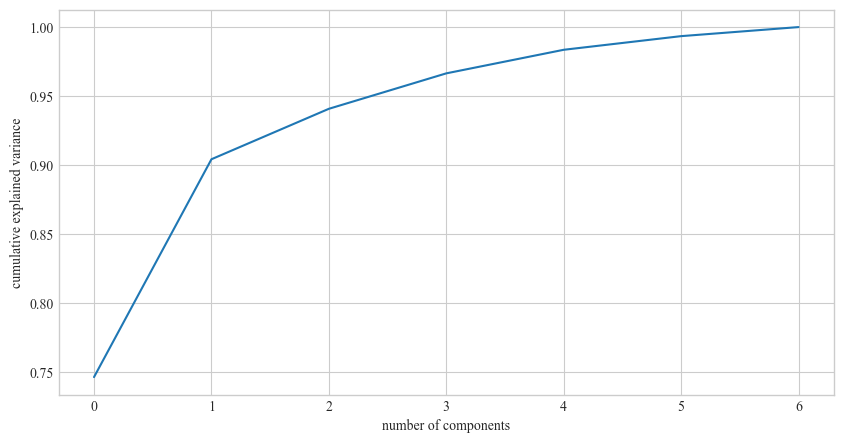

In [46]:
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [47]:
pca_scale.shape

(49540, 7)

In [48]:
pca = PCA(n_components=.99)
X_pca = pca.fit_transform(pca_scale)
pca.n_components_

6

In [49]:
pca.explained_variance_ratio_

array([0.74646042, 0.15780135, 0.03654533, 0.02567336, 0.01707431,
       0.00988635])

In [50]:
X_pca=pd.DataFrame(X_pca,index=Final.index)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_pca,y,test_size=.20,shuffle=False,random_state=True)

In [52]:
y_test

2020-01-07 07:30:00+00:00    232.200062
2020-01-07 07:40:00+00:00    241.845158
2020-01-07 07:50:00+00:00    255.417222
2020-01-07 08:00:00+00:00    295.794739
2020-01-07 08:10:00+00:00    257.209504
                                ...    
2020-03-30 23:10:00+00:00     70.044465
2020-03-30 23:20:00+00:00     40.833474
2020-03-30 23:30:00+00:00     20.777790
2020-03-30 23:40:00+00:00     62.091039
2020-03-30 23:50:00+00:00     68.664425
Name: ActivePower, Length: 9908, dtype: float64

In [53]:
models = [
    LinearSVR(),
    LinearRegression(),
    Ridge(),
    Lasso(),
    KNeighborsRegressor(),
    DecisionTreeRegressor(),
    GradientBoostingRegressor()
]

In [54]:
%%time
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

m=[]
train_t=[]
predict_t=[]
mse=[]
mae=[]
r2=[]
mape=[]
rmse=[]

Wall time: 0 ns


In [55]:
for model in models:
    start = time()
    model.fit(X_train, y_train)
    train_time = time() - start
    train_t.append(train_time)
    y_pred = model.predict(X_test)
    start = time()
    y_pred = model.predict(X_test)
    predict_time = time()-start   
    predict_t.append(predict_time) 
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tMean squared error:", mean_squared_error(y_test, y_pred))
    mse.append(mean_squared_error(y_test, y_pred))
    print("\tMean absolute error:", mean_absolute_error(y_test, y_pred))
    mae.append(mean_absolute_error(y_test, y_pred))
    print("\tMAPE percentage:", mean_absolute_percentage_error(y_test, y_pred))
    mape.append(mean_absolute_percentage_error(y_test, y_pred))
    print("\tR2 score:", r2_score(y_test, y_pred))
    r2.append(r2_score(y_test, y_pred))
    print("\tRMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    print("")
  

LinearSVR()
	Training time: 0.032s
	Prediction time: 0.001s
	Mean squared error: 46496.02718533737
	Mean absolute error: 74.50923415984701
	MAPE percentage: 63604175581262.84
	R2 score: 0.8144631438892276
	RMSE: 215.62937458829066

LinearRegression()
	Training time: 0.004s
	Prediction time: 0.000s
	Mean squared error: 38380.64938859928
	Mean absolute error: 77.97054682609497
	MAPE percentage: 12517623326605.81
	R2 score: 0.8468465919751488
	RMSE: 195.90979911326355

Ridge()
	Training time: 0.003s
	Prediction time: 0.000s
	Mean squared error: 38368.78969418108
	Mean absolute error: 77.96733498951009
	MAPE percentage: 12433402048046.004
	R2 score: 0.8468939166725475
	RMSE: 195.87952852245965

Lasso()
	Training time: 0.013s
	Prediction time: 0.000s
	Mean squared error: 36826.29061729912
	Mean absolute error: 76.54277576015161
	MAPE percentage: 7916814264389.184
	R2 score: 0.8530490754377827
	RMSE: 191.90177335631665

KNeighborsRegressor()
	Training time: 0.031s
	Prediction time: 0.174s
	M

In [56]:
import xgboost as xgb

In [57]:
model = xgb.XGBRegressor(n_estimators=720)

In [58]:
# Fit the model to the training data 
# Fit the model to the training data 
# %%time
start = time()
model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)],
          early_stopping_rounds=50, #stop if 50 consequent rounds without decrease of error
          verbose=False) 
train_time = time() - start
start = time()
y_pred = model.predict(X_test)
predict_time = time()-start    
print(model)
print("\tTraining time: %0.3fs" % train_time)
print("\tPrediction time: %0.3fs" % predict_time)
print("\tMean squared error:", mean_squared_error(y_test, y_pred))
print("\tMean absolute error:", mean_absolute_error(y_test, y_pred))
print("\tMAPE percentage:", mean_absolute_percentage_error(y_test, y_pred))
print("\tR2 score:", r2_score(y_test, y_pred))
print("\tRMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    
print()
train_t.append(train_time)
predict_t.append(predict_time)
mse.append(mean_squared_error(y_test,y_pred))
mae.append(mean_absolute_error(y_test,y_pred))
r2.append(r2_score(y_test,y_pred))
mape.append(mean_absolute_percentage_error(y_test, y_pred))
rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=720, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
	Training time: 3.162s
	Prediction time: 0.007s
	Mean squared error: 11549.065069332406
	Mean absolute error: 46.91571540660063
	MAPE percentage: 16353869119111.338
	R2 score: 0.953914832004004
	RMSE: 107.46657652187682



In [59]:
df_final = pd.DataFrame(data={'Actuals':y_test, 'Predictions':y_pred })  
df_final

,Actuals,Predictions
2020-01-07 07:30:00+00:00,232.200062,206.775574
2020-01-07 07:40:00+00:00,241.845158,213.183823
2020-01-07 07:50:00+00:00,255.417222,217.402725
2020-01-07 08:00:00+00:00,295.794739,275.316528
2020-01-07 08:10:00+00:00,257.209504,253.224197
...,...,...
2020-03-30 23:10:00+00:00,70.044465,62.452667
2020-03-30 23:20:00+00:00,40.833474,52.488258
2020-03-30 23:30:00+00:00,20.777790,32.306976
2020-03-30 23:40:00+00:00,62.091039,55.225464


In [60]:
df_final=df_final.resample('D').mean()


In [61]:
df_final

,Actuals,Predictions
2020-01-07 00:00:00+00:00,763.496895,765.161255
2020-01-08 00:00:00+00:00,420.538188,419.735779
2020-01-09 00:00:00+00:00,847.914123,837.944092
2020-01-10 00:00:00+00:00,692.779491,698.612549
2020-01-11 00:00:00+00:00,425.769500,430.046631
...,...,...
2020-03-26 00:00:00+00:00,732.042233,680.792969
2020-03-27 00:00:00+00:00,728.896074,712.654358
2020-03-28 00:00:00+00:00,874.011580,860.345764
2020-03-29 00:00:00+00:00,840.439852,777.355774


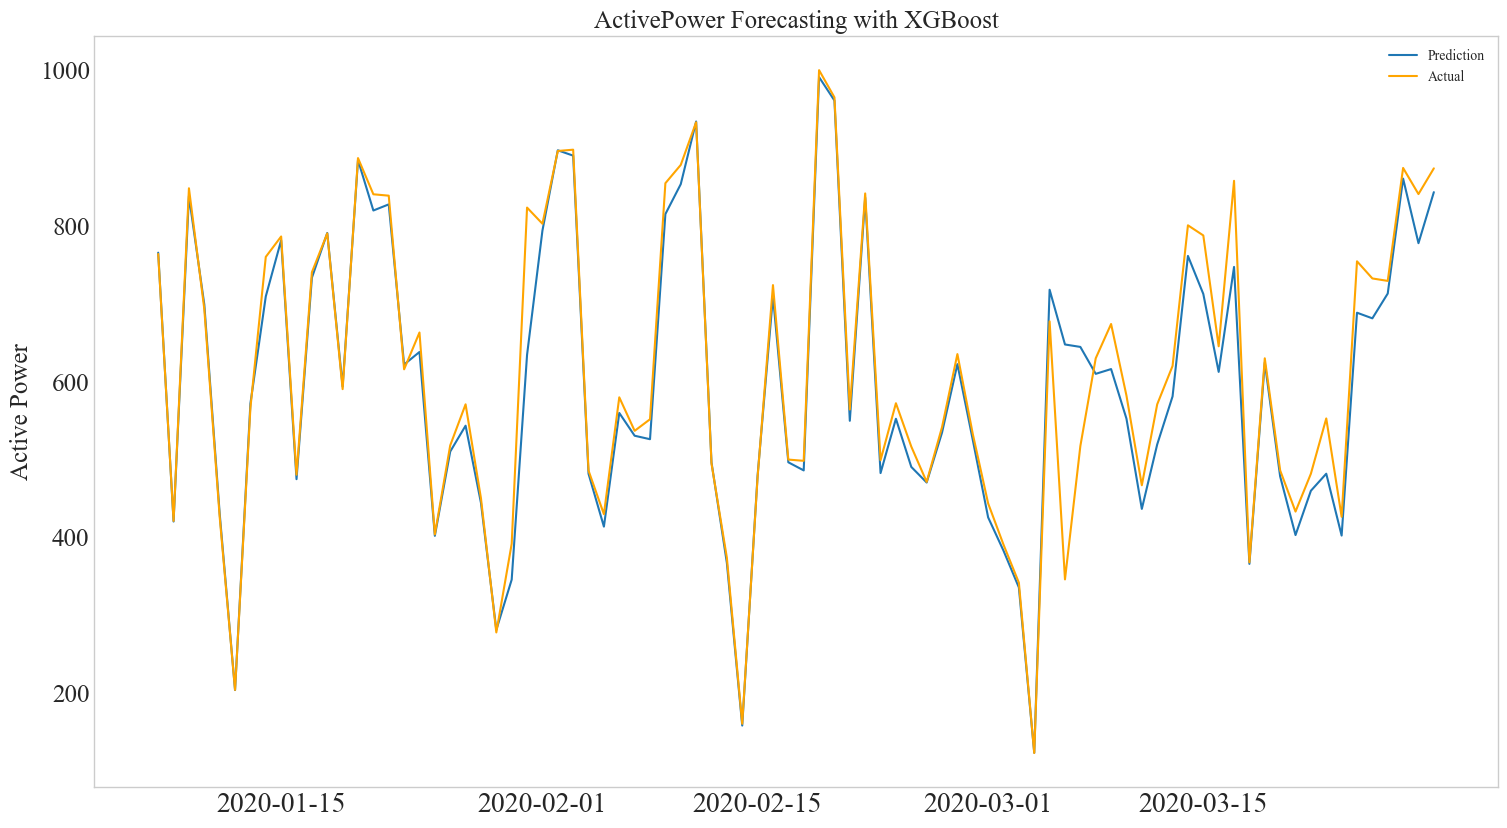

In [62]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.plot(df_final['Predictions'], label='Prediction')
plt.plot(df_final['Actuals'], color='orange', label='Actual')
plt.rcParams['font.family'] = 'Times New Roman'
plt.ylabel('Active Power', fontsize=18)
plt.legend()
plt.tight_layout()
plt.grid()
plt.yticks(fontsize=18)
plt.title("ActivePower Forecasting with XGBoost", fontsize=18)

mpl.rcParams['xtick.labelsize'] = 18  # 设置x轴标签的字体大小
xticks = plt.xticks()[0]
xticks = xticks[:-1]
plt.xticks(xticks, fontsize=20)  # 设置x轴标签的字体大小

plt.savefig('plot6.svg', format='svg', dpi=1200, bbox_inches='tight')
plt.show()


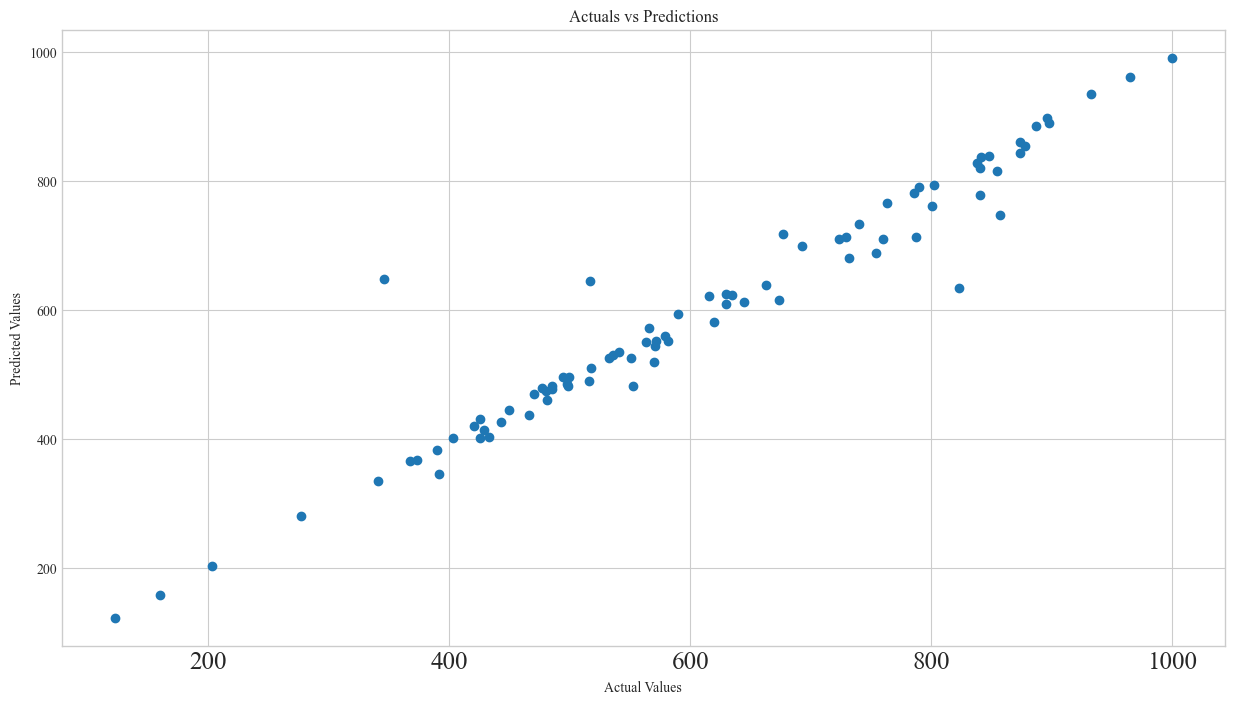

In [63]:
import matplotlib.pyplot as plt

# 绘制散点图
plt.scatter(df_final['Actuals'], df_final['Predictions'])

# 添加标题和坐标轴标签
plt.title('Actuals vs Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# 显示图形
plt.savefig('plot4.svg', format='svg', dpi=1200, bbox_inches='tight')
plt.show()


In [64]:
#
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
#Fit the model to the training data 
# %%time
start = time()
model.fit(X_train, y_train)
train_time = time() - start
start = time()
y_pred = model.predict(X_test)
predict_time = time()-start    
print(model)
print("\tTraining time: %0.3fs" % train_time)
print("\tPrediction time: %0.3fs" % predict_time)
print("\tMean squared error:", mean_squared_error(y_test, y_pred))
print("\tMean absolute error:", mean_absolute_error(y_test, y_pred))
print("\tMAPE percentage:", mean_absolute_percentage_error(y_test, y_pred))
mape.append(mean_absolute_percentage_error(y_test, y_pred))
print("\tR2 score:", r2_score(y_test, y_pred))
print("\tRMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    
print()
train_t.append(train_time)
mse.append(mean_squared_error(y_test,y_pred))
mae.append(mean_absolute_error(y_test,y_pred))
r2.append(r2_score(y_test,y_pred))
rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))

RandomForestRegressor()
	Training time: 20.442s
	Prediction time: 0.211s
	Mean squared error: 23275.480910301136
	Mean absolute error: 59.66622747954144
	MAPE percentage: 13358812395282.055
	R2 score: 0.9071219668865513
	RMSE: 152.56303913563448



In [65]:
predict_t.append(predict_time)

In [66]:
df_final2 = pd.DataFrame(data={'Actuals':y_test, 'Predictions':y_pred}, index=y_test.index)  
df_final2.head()

,Actuals,Predictions
2020-01-07 07:30:00+00:00,232.200062,226.480726
2020-01-07 07:40:00+00:00,241.845158,233.710412
2020-01-07 07:50:00+00:00,255.417222,246.657327
2020-01-07 08:00:00+00:00,295.794739,282.535425
2020-01-07 08:10:00+00:00,257.209504,244.963291


In [67]:
df_final2=df_final2.resample('D').mean()

In [68]:
df_final2

,Actuals,Predictions
2020-01-07 00:00:00+00:00,763.496895,760.343286
2020-01-08 00:00:00+00:00,420.538188,417.108846
2020-01-09 00:00:00+00:00,847.914123,831.319511
2020-01-10 00:00:00+00:00,692.779491,690.716979
2020-01-11 00:00:00+00:00,425.769500,424.712630
...,...,...
2020-03-26 00:00:00+00:00,732.042233,660.079059
2020-03-27 00:00:00+00:00,728.896074,685.663237
2020-03-28 00:00:00+00:00,874.011580,790.303713
2020-03-29 00:00:00+00:00,840.439852,722.678355


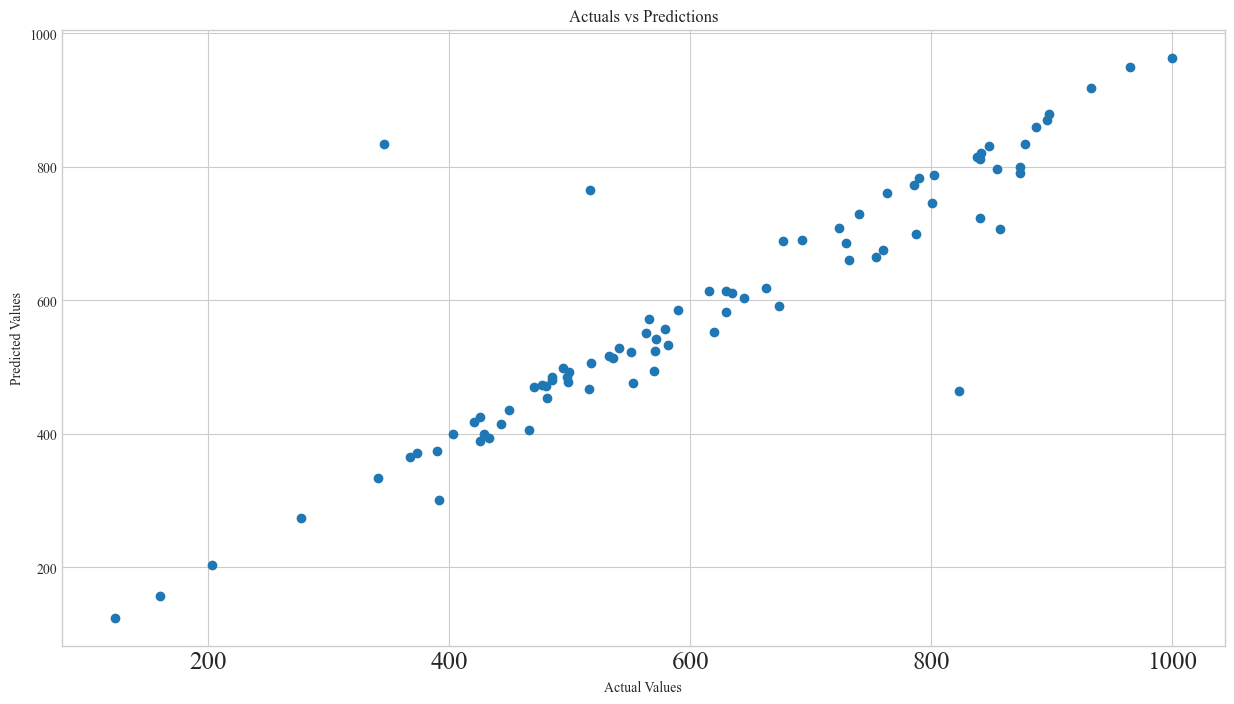

In [69]:
import matplotlib.pyplot as plt

# 绘制散点图
plt.scatter(df_final2['Actuals'], df_final2['Predictions'])

# 添加标题和坐标轴标签
plt.title('Actuals vs Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# 显示图形
plt.savefig('plot5.svg', format='svg', dpi=1200, bbox_inches='tight')
plt.show()


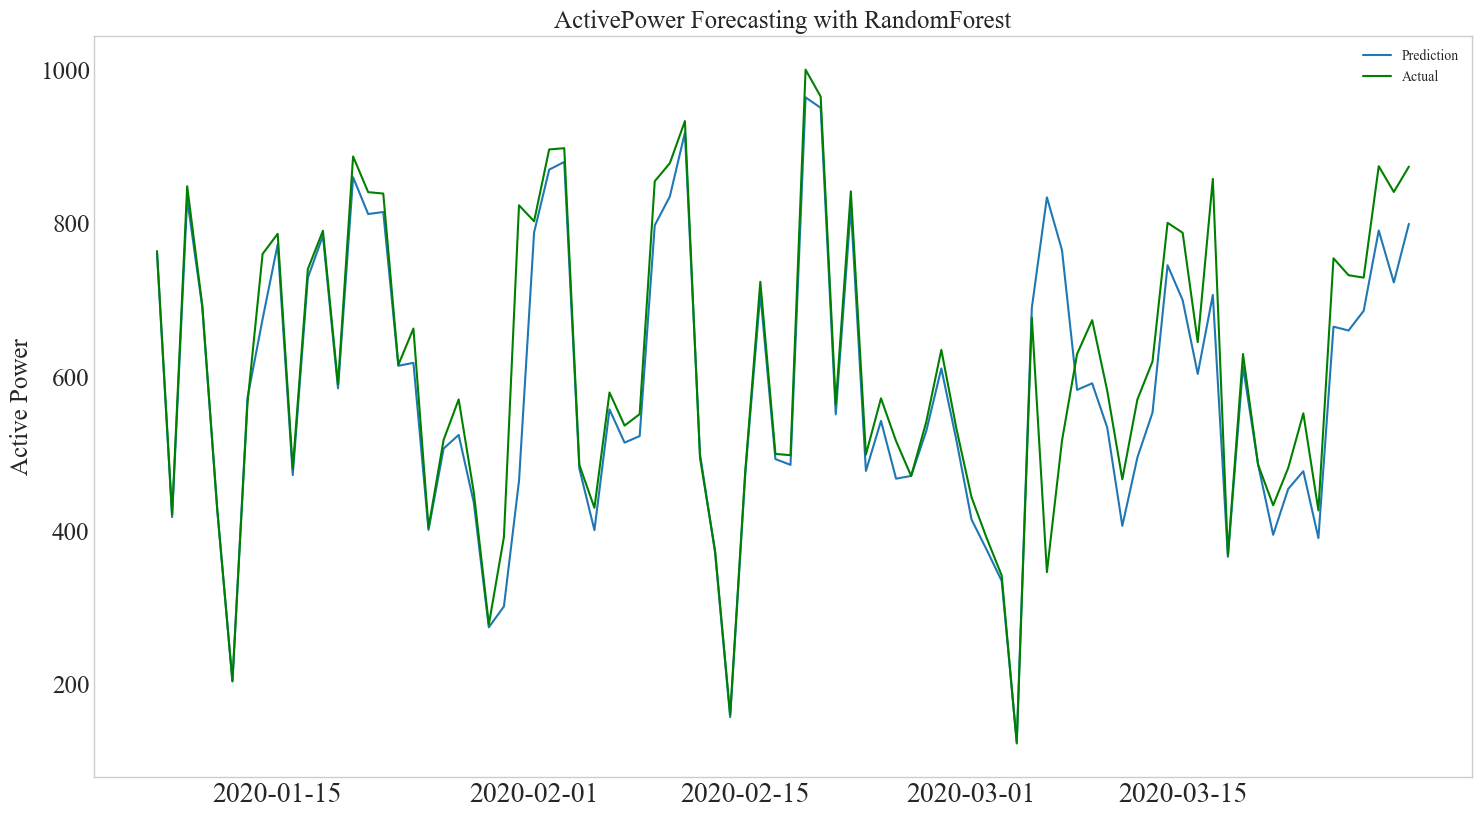

In [70]:
# plot


import matplotlib as mpl
plt.plot(df_final2['Predictions'],label='Prediction')
plt.plot(df_final2['Actuals'], color='green',label='Actual')
plt.rcParams['font.family'] = 'Times New Roman'
plt.ylabel('Active Power',fontsize=18)
plt.legend()
plt.tight_layout()
plt.grid()
plt.yticks(fontsize=18)

plt.title("ActivePower Forecasting with RandomForest",fontsize=18)
mpl.rcParams['xtick.labelsize'] = 18
xticks = plt.xticks()[0]
xticks = xticks[:-1]
plt.xticks(xticks, fontsize=20) 

plt.xticks(xticks)
plt.savefig('plot7.svg', format='svg', dpi=1200, bbox_inches='tight')
plt.show()

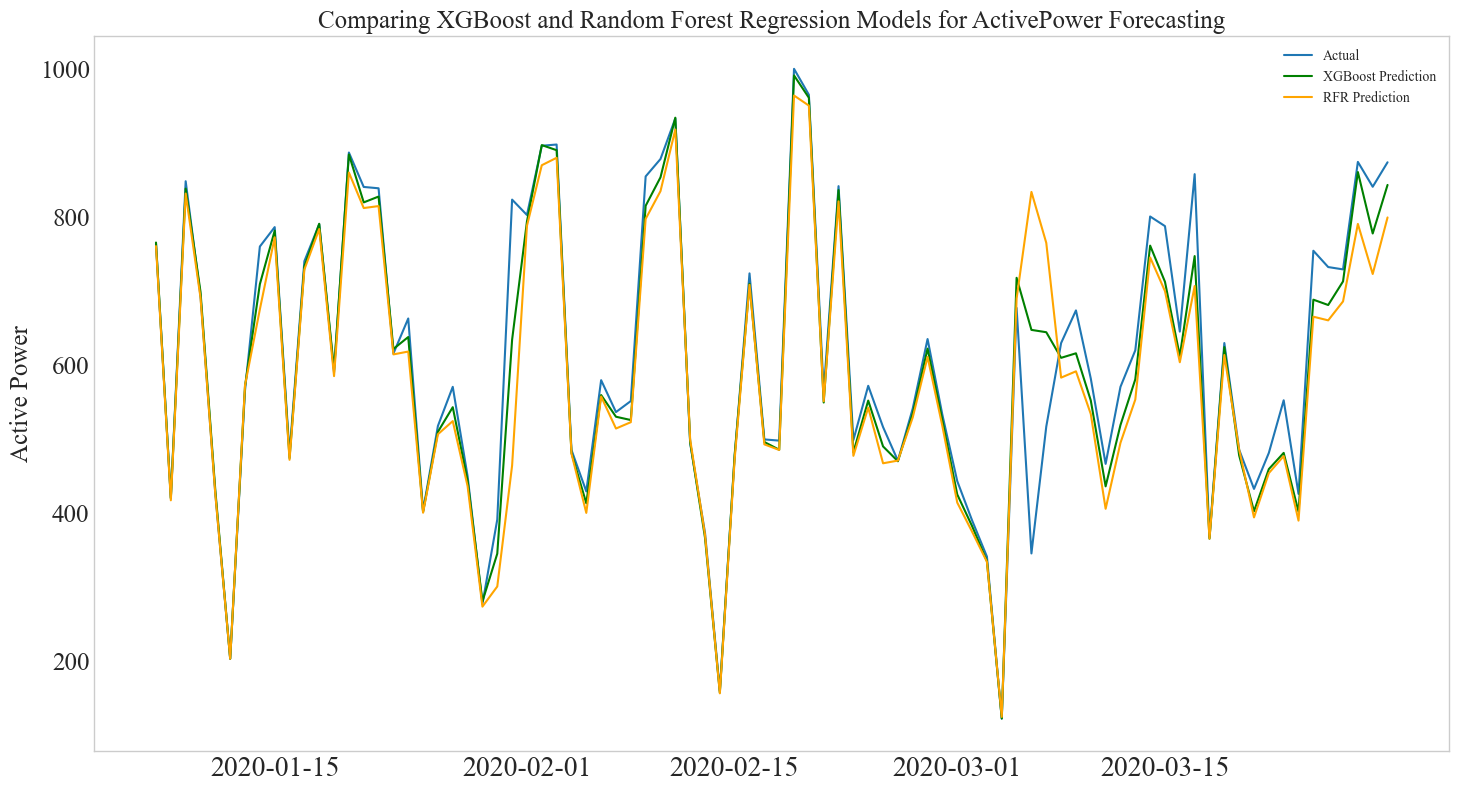

In [71]:
import pandas as pd
import matplotlib.pyplot as plt



# 绘制折线图
plt.plot(df_final['Actuals'],label='Actual')
plt.plot(df_final['Predictions'],label='XGBoost Prediction',color='green')
plt.plot(df_final2['Predictions'],label='RFR Prediction',color='orange')
plt.rcParams['font.family'] = 'Times New Roman'
plt.ylabel('Active Power',fontsize=18)
plt.title('Comparing XGBoost and Random Forest Regression Models for ActivePower Forecasting',fontsize=18)
plt.legend()
plt.yticks(fontsize=18)

plt.tight_layout()
plt.grid()
mpl.rcParams['xtick.labelsize'] = 18
xticks = plt.xticks()[0]
xticks = xticks[:-1]
plt.xticks(xticks, fontsize=20) 

plt.xticks(xticks)
plt.savefig('plot_comparison.svg', format='svg', dpi=1200, bbox_inches='tight')
plt.show()


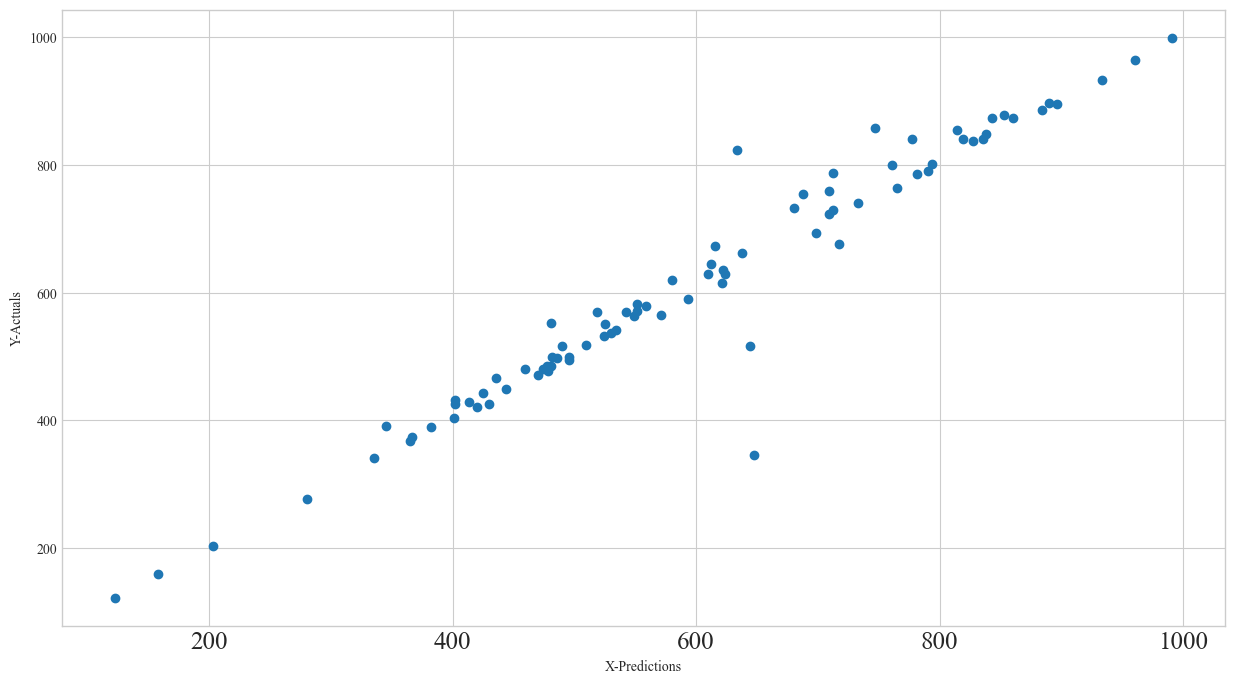

In [72]:
import matplotlib.pyplot as plt
import numpy as np


# 绘制散点图
plt.scatter(df_final['Predictions'], df_final['Actuals'])

# 添加标题和坐标轴标签

plt.xlabel('X-Predictions')
plt.ylabel('Y-Actuals')

# 显示图形
plt.show()

In [73]:
Uni=Final.ActivePower

In [74]:
Uni.shape

(49540,)

In [75]:
49536-49536/10

44582.4

In [76]:
# train is from 0 to 44582 test is from 44582 to 49536
  
train, test = Uni[0:44582], Uni[44582:]
train.shape,test.shape

((44582,), (4958,))

In [77]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
#scaler.fit(train)
train = scaler.fit_transform(train.values.reshape(-1,1))
test = scaler.transform(test.values.reshape(-1,1))

In [78]:
from keras.preprocessing.sequence import TimeseriesGenerator
import tensorflow as tf

train=TimeseriesGenerator(train,train,length=720,sampling_rate=1,batch_size=32)
test=TimeseriesGenerator(test,test,length=720,sampling_rate=1,batch_size=32)

In [79]:
import tensorflow as tf

window_length=720
model=tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128,input_shape=(window_length,1),return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.LSTM(128,return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.LSTM(64,return_sequences=False))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1))

In [80]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 720, 128)          66560     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 720, 128)          0         
                                                                 
 lstm_1 (LSTM)               (None, 720, 128)          131584    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 720, 128)          0         
                                                                 
 dropout (Dropout)           (None, 720, 128)          0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

In [81]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [82]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [83]:
physical_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs:", len(physical_devices))

Num GPUs: 1


In [84]:
start = time()

cp=ModelCheckpoint('model/',save_best_only=True)
early_stopping=tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=2,mode="min")
model.compile(loss=tf.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=[tf.metrics.MeanSquaredError()])
history=model.fit_generator(train,epochs=20,
                            validation_data=test,
                            shuffle=False,
                            callbacks=[early_stopping,cp]) 
train_time = time() - start
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

Epoch 1/20
 879/1371 [==================>...........] - ETA: 1:17 - loss: 0.0238 - mean_squared_error: 0.0238

KeyboardInterrupt: 

In [ ]:
# demonstrate prediction
start = time()
prediction = model.predict(test, verbose=0)
pred = scaler.inverse_transform(prediction)
predict_time = time()-start  

In [ ]:
pred[0][0:15]

In [ ]:
df_final = pd.DataFrame(data={'Actuals':Uni[-4238:], 'Predictions':pred[:,0]}, index =Uni[-4238:].index)  
df_final

In [ ]:
print("Univariate LSTM")
print("\tTraining time: %0.3fs" % train_time)
print("\tPrediction time: %0.3fs" % predict_time)


print("\tMean squared error:", mean_squared_error(df_final['Actuals'],df_final['Predictions'],squared=False))
print("\tMean absolute error:",mean_absolute_error(df_final['Actuals'],df_final['Predictions']))
print("\tMAPE percentage:", mean_absolute_percentage_error(df_final['Actuals'],df_final['Predictions']))
mape.append(mean_absolute_percentage_error(df_final['Actuals'],df_final['Predictions']))
print("\tR2 score:", r2_score(df_final['Actuals'],df_final['Predictions']))
print()
train_t.append(train_time)
mse.append(mean_squared_error(df_final['Actuals'],df_final['Predictions'],squared=False))
mae.append(mean_absolute_error(df_final['Actuals'],df_final['Predictions']))
r2.append(r2_score(df_final['Actuals'],df_final['Predictions']))

In [ ]:
predict_t.append(predict_time)

In [ ]:
# plot
plt.plot(df_final['Predictions'],label='Prediction')
plt.plot(df_final['Actuals'], color='red',label='Actual')

plt.ylabel('Active Power')
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()

In [ ]:
Report=pd.DataFrame()
Report["Model"]=["SVR","Linear Regressor","Ridge Regressor","Lasso Regressor","KNeighborsRegressor","DecisionTree","GradiantBoosting",
                 "XGBoost","RandomForest","Univariate LSTM"]
Report["Mean Absolute Error"]=mae
Report["Mean Squared Error"]=mse
Report["Mean absolute percentage error"]=mape
Report["R2 Score"]=r2
Report["Traning Time"]=train_t
Report["Prediction Time"]=predict_t
Report.index=np.arange(1, len(Report) + 1)

In [ ]:
Report


In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
for model in models:
  print(model)
  print((cross_val_score(model, X_train, y_train, cv=5)).mean())